<a href="https://colab.research.google.com/github/teenup96/FacialExpressionRecognition/blob/main/Fake_Reviews_Detection_in_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
nltk.download('omw-1.4')
!pip install deep_translator

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 8.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
!pip install deep_translator
from deep_translator import GoogleTranslator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 8.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [158]:
df = pd.read_csv('fake reviews dataset.csv', encoding='utf-8')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [159]:
from tqdm import tqdm

In [ ]:


for ix in tqdm(df.itertuples(), total= len(df)):
  translated_text = GoogleTranslator(source='en', target='fr').translate(ix.text_)
  translated_category = GoogleTranslator(source='en', target='fr').translate(ix.category)
  df.loc[ix.Index, "text_"] = translated_text
  df.loc[ix.Index, "category"] = translated_category
df.head() 
  #df.iloc(df)= translated_value

  0%|          | 200/40432 [02:21<9:56:43,  1.12it/s]

In [97]:
df.head()
df.isnull().sum()

category    0
rating      0
label       0
text_       0
length      0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  10 non-null     object 
 1   rating    10 non-null     float64
 2   label     10 non-null     object 
 3   text_     10 non-null     object 
 4   length    10 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 780.0+ bytes


In [99]:
df.describe()

,rating,length
count,10.000000,10.000000
mean,4.200000,55.600000
std,1.398412,8.342661
min,1.000000,47.000000
25%,3.500000,48.500000
50%,5.000000,54.000000
75%,5.000000,60.500000
max,5.000000,72.000000


In [100]:
df['rating'].value_counts()

5.0    7
3.0    2
1.0    1
Name: rating, dtype: int64

In [101]:
df.head()

,category,rating,label,text_,length
0,Maison_et_Cuisine_5,5.0,CG,but ça bien fait solide trè confort j'adore tr...,50
1,Maison_et_Cuisine_5,5.0,CG,j'adore excellente mise niveau l'origine j'ai ...,65
2,Maison_et_Cuisine_5,5.0,CG,cet oreil a sauvé do j'aim look sensat cet oreil,48
3,Maison_et_Cuisine_5,1.0,CG,il manqu inform utilis c'est excel produit prix,47
4,Maison_et_Cuisine_5,5.0,CG,trè bel ensemble bonn qualité nou l'ensemble d...,72


ValueError: ignored

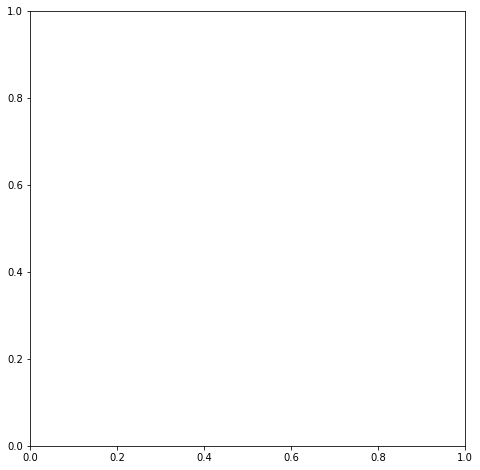

In [102]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [103]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('french')])

In [104]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
df['text_'][0], clean_text(df['text_'][0])

("but ça bien fait solide trè confort j'adore trè joli",
 'but ça bien fait solide trè confort jadore trè joli')

In [106]:
df['text_'].head().apply(clean_text)

0    but ça bien fait solide trè confort jadore trè...
1    jadore excellente mise niveau lorigine jai mie...
2      cet oreil a sauvé do jaim look sensat cet oreil
3          manqu inform utilis cest excel produit prix
4    trè bel ensemble bonn qualité nou lensemble de...
Name: text_, dtype: object

In [107]:
df.shape

(10, 5)

In [108]:
#df['text_'] = df['text_'].apply(clean_text)

In [109]:
df['text_'] = df['text_'].astype(str)

In [110]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('french') and not word.isdigit() and word not in string.punctuation])

In [112]:
preprocess(df['text_'][4])

"trè bel ensemble bonn qualité nou l'ensemble depui deux mainten n'avon"

In [113]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [114]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

ValueError: ignored

In [115]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

ValueError: ignored

In [116]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

ValueError: ignored

In [117]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

ValueError: ignored

In [125]:
df['text_'] = df['text_'].str.lower()

In [126]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [127]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [128]:
df_demo =df
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df_demo["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [129]:
df['text_'][0]


"but ça bien fait solid trè confort j'ador trè joli"

In [130]:
df_demo['text_'][0]

"but ça bien fait solid trè confort j'ador trè joli"

In [131]:
df['text_'].head()

0    but ça bien fait solid trè confort j'ador trè ...
1    j'ador excel mise niveau l'origin j'ai mien de...
2     cet oreil a sauvé do j'aim look sensat cet oreil
3          manqu inform utili c'est excel produit prix
4    trè bel ensembl bonn qualité nou l'ensembl dep...
Name: text_, dtype: object

In [132]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [134]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_,length
0,0,Maison_et_Cuisine_5,5.0,CG,but ça bien fait solid trè confort j'ador trè ...,50
1,1,Maison_et_Cuisine_5,5.0,CG,j'ador excel mise niveau l'origin j'ai mien de...,65
2,2,Maison_et_Cuisine_5,5.0,CG,cet oreil a sauvé do j'aim look sensat cet oreil,48
3,3,Maison_et_Cuisine_5,1.0,CG,manqu inform utili c'est excel produit prix,47
4,4,Maison_et_Cuisine_5,5.0,CG,trè bel ensembl bonn qualité nou l'ensembl dep...,72


In [135]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [136]:
df.head()

,category,rating,label,text_,length
0,Maison_et_Cuisine_5,5.0,CG,but ça bien fait solid trè confort j'ador trè ...,50
1,Maison_et_Cuisine_5,5.0,CG,j'ador excel mise niveau l'origin j'ai mien de...,65
2,Maison_et_Cuisine_5,5.0,CG,cet oreil a sauvé do j'aim look sensat cet oreil,48
3,Maison_et_Cuisine_5,1.0,CG,manqu inform utili c'est excel produit prix,47
4,Maison_et_Cuisine_5,5.0,CG,trè bel ensembl bonn qualité nou l'ensembl dep...,72


In [137]:
df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  10 non-null     object 
 1   rating    10 non-null     float64
 2   label     10 non-null     object 
 3   text_     10 non-null     object 
 4   length    10 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 480.0+ bytes


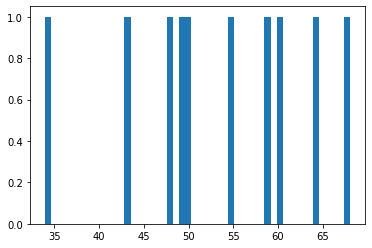

In [138]:
plt.hist(df['length'],bins=50)
plt.show()

In [139]:
df.groupby('label').describe()


rating                                         length                   \
       count mean       std  min  25%  50%  75%  max  count  mean        std   
label                                                                          
CG      10.0  4.2  1.398412  1.0  3.5  5.0  5.0  5.0   10.0  53.0  10.252371   

                                       
        min    25%   50%    75%   max  
label                                  
CG     34.0  48.25  52.5  59.75  68.0

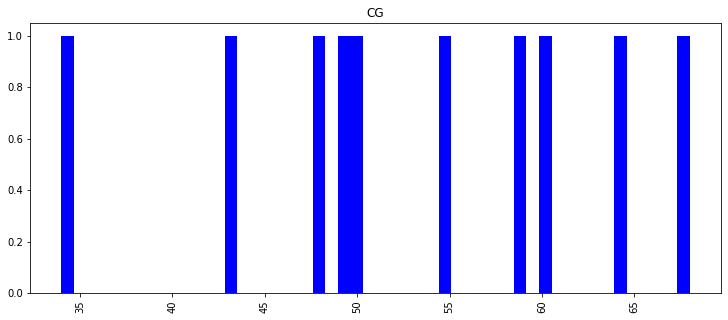

In [140]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [141]:

df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_



IndexError: ignored

In [142]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('french')]

In [143]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f9bea048dd0>)

In [144]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 76


In [145]:
review4 = df['text_'][3]
review4


"manqu inform utili c'est excel produit prix"

In [146]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 12)	1
  (0, 27)	1
  (0, 34)	1
  (0, 46)	1
  (0, 58)	1
  (0, 59)	1
  (0, 72)	1
(1, 76)


In [147]:
print(bow_transformer.get_feature_names()[22])
print(bow_transformer.get_feature_names()[34])

deux
inform


In [148]:
bow_reviews = bow_transformer.transform(df['text_'])

In [149]:




print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (10, 76)
Amount of non zero values in the bag of words model: 91


In [150]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 11.97


In [151]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 12)	1
  (0, 27)	1
  (0, 34)	1
  (0, 46)	1
  (0, 58)	1
  (0, 59)	1
  (0, 72)	1


In [152]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['avoir']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['anné']])

KeyError: ignored

In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

In [153]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [154]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [155]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9bea048dd0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [156]:

predictions = pipeline.predict(review_test)
predictions

array(['CG', 'CG', 'CG', 'CG'], dtype='<U2')

In [157]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

ValueError: ignored

In [74]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 62.86%


In [75]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [76]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9bdf69e290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [77]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'OR', 'OR', 'CG', 'CG', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR',
       'OR', 'CG', 'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR',
       'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'CG', 'OR', 'OR', 'CG', 'CG',
       'CG', 'OR'], dtype=object)

In [78]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.62      0.70        21
          OR       0.58      0.79      0.67        14

    accuracy                           0.69        35
   macro avg       0.70      0.70      0.68        35
weighted avg       0.72      0.69      0.69        35

Confusion Matrix: [[13  8]
 [ 3 11]]
Accuracy Score: 0.6857142857142857
Model Prediction Accuracy: 68.57%


In [79]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [80]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9bdf69e290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [81]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['CG', 'OR', 'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR',
       'OR', 'CG', 'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR',
       'OR', 'CG', 'OR', 'CG', 'OR', 'OR', 'OR', 'OR', 'OR', 'CG', 'OR',
       'CG', 'OR'], dtype=object)

In [82]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.92      0.57      0.71        21
          OR       0.59      0.93      0.72        14

    accuracy                           0.71        35
   macro avg       0.76      0.75      0.71        35
weighted avg       0.79      0.71      0.71        35

Confusion Matrix: [[12  9]
 [ 1 13]]
Accuracy Score: 0.7142857142857143
Model Prediction Accuracy: 71.43%


In [83]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [84]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9bdf69e290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [85]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR'], dtype=object)

In [86]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.61      0.90      0.73        21
          OR       0.50      0.14      0.22        14

    accuracy                           0.60        35
   macro avg       0.56      0.52      0.48        35
weighted avg       0.57      0.60      0.53        35

Confusion Matrix: [[19  2]
 [12  2]]
Accuracy Score: 0.6
Model Prediction Accuracy: 60.0%


In [87]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])


In [88]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9bdf69e290>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [89]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG',
       'CG', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR'], dtype=object)

In [90]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.66      0.90      0.76        21
          OR       0.67      0.29      0.40        14

    accuracy                           0.66        35
   macro avg       0.66      0.60      0.58        35
weighted avg       0.66      0.66      0.62        35

Confusion Matrix: [[19  2]
 [10  4]]
Accuracy Score: 0.6571428571428571
Model Prediction Accuracy: 65.71%


In [91]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [92]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9bdf69e290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [93]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'OR', 'CG', 'CG', 'OR', 'CG',
       'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'OR', 'OR',
       'OR', 'CG', 'OR', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG', 'CG',
       'CG', 'OR'], dtype=object)

In [94]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.69      0.86      0.77        21
          OR       0.67      0.43      0.52        14

    accuracy                           0.69        35
   macro avg       0.68      0.64      0.64        35
weighted avg       0.68      0.69      0.67        35

Confusion Matrix: [[18  3]
 [ 8  6]]
Accuracy Score: 0.6857142857142857
Model Prediction Accuracy: 68.57%


In [95]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 68.57%
K Nearest Neighbors Prediction Accuracy: 60.0%
Decision Tree Classifier Prediction Accuracy: 71.43%
Random Forests Classifier Prediction Accuracy: 68.57%
Support Vector Machines Prediction Accuracy: 65.71%
Multinomial Naive Bayes Prediction Accuracy: 62.86%
